## <font color = 'green'> Import Libraries

In [2]:
import numpy as np
import math

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import zscore

## <font color = 'green'> Dataset

In [3]:
df = pd.read_csv('car_mpg.csv')
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


#### <font color = 'blue'> Inference
- Here in this car_mpg dataset have 398 rows and 10 columns 

In [4]:
df = df.drop('car_name', axis = 1)

In [5]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [6]:
df.shape 

(398, 9)

#### <font color = 'blue'> Inference
- Here in this car_mpg dataset have 398 rows and 10 columns 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


#### <font color = 'blue'> Inference
- The only hp feature are object data type and remains are float and int data types

In [8]:
df.nunique()

mpg         129
cyl           5
disp         82
hp           94
wt          351
acc          95
yr           13
origin        3
car_type      2
dtype: int64

## <font color = 'green'> Encoding Technique

In [9]:
df.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [10]:
df.origin.unique()

array([1, 3, 2], dtype=int64)

In [11]:
df['origin'] = df['origin'].replace({1:'america', 2:'europe', 3:'asia'})

In [12]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0


### One-Hot Encoding

In [13]:
df = pd.get_dummies(df, columns = ['origin'])
df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


#### <font color = 'blue'> Inference
- One-Hot Encoding convert a categorical variable into dummy variable (numerical). The columns will be created as distinct values
- The column name will be america, europe and asia with one-hot encoding

#### <font color = 'blue'> Statistics
    

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [15]:
df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

## <font color = 'green'> Data Cleaning

In [16]:
df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

- In this dataset there is no null values in any column

####  Lets check the presence of special character

In [17]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type',
       'origin_america', 'origin_asia', 'origin_europe'],
      dtype='object')

In [18]:
df.mpg.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [19]:
df.cyl.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [20]:
df.disp.unique()

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 113. , 198. , 199. , 200. ,  97. ,
       110. , 107. , 104. , 121. , 360. , 140. ,  98. , 232. , 225. ,
       250. , 351. , 258. , 122. , 116. ,  79. ,  88. ,  71. ,  72. ,
        91. ,  97.5,  70. , 120. ,  96. , 108. , 155. ,  68. , 114. ,
       156. ,  76. ,  83. ,  90. , 231. , 262. , 134. , 119. , 171. ,
       115. , 101. , 305. ,  85. , 130. , 168. , 111. , 260. , 151. ,
       146. ,  80. ,  78. , 105. , 131. , 163. ,  89. , 267. ,  86. ,
       183. , 141. , 173. , 135. ,  81. , 100. , 145. , 112. , 181. ,
       144. ])

In [21]:
df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

- There is presence '?' special character in the hp column 

In [22]:
temp = pd.DataFrame(df.hp.str.isdigit())
temp

,hp
0,True
1,True
2,True
3,True
4,True
...,...
393,True
394,True
395,True
396,True


#### <font color='blue'> Inference
- run the "isdigit() check on 'hp' column of the df dataframe. Result will be either True or False for every row
- capture the result in temp dataframe.

In [23]:
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


<font color = 'blue'> **Inference**
- There are six records with non digit values in 'hp' column
- temp variable if the string is made of digits store True else False in the hp column (in temp dataframe)
- from temp take only those rows where hp has false

In [24]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type',
       'origin_america', 'origin_asia', 'origin_europe'],
      dtype='object')

In [25]:
df.wt.unique()

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2264, 2228, 2046, 2634,
       3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746, 5140,
       2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613, 1834,
       1955, 2278, 2126, 2254, 2226, 4274, 4385, 4135, 4129, 3672, 4633,
       4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933, 2511, 2979,
       2189, 2395, 2288, 2506, 2164, 2100, 4100, 3988, 4042, 3777, 4952,
       4363, 4237, 4735, 4951, 3821, 3121, 3278, 2945, 3021, 2904, 1950,
       4997, 4906, 4654, 4499, 2789, 2279, 2401, 2379, 2124, 2310, 2472,
       2265, 4082, 4278, 1867, 2158, 2582, 2868, 3399, 2660, 2807, 3664,
       3102, 2875, 2901, 3336, 2451, 1836, 2542, 3781, 3632, 3613, 4141,
       4699, 4457, 4638, 4257, 2219, 1963, 2300, 1649, 2003, 2125, 2108,
       2246, 2489, 2391, 2000, 3264, 3459, 3432, 31

In [26]:
df.acc.unique()

array([12. , 11.5, 11. , 10.5, 10. ,  9. ,  8.5,  8. ,  9.5, 15. , 15.5,
       16. , 14.5, 20.5, 17.5, 12.5, 14. , 13.5, 18.5, 19. , 13. , 19.5,
       18. , 17. , 23.5, 16.5, 21. , 16.9, 14.9, 17.7, 15.3, 13.9, 12.8,
       15.4, 17.6, 22.2, 22.1, 14.2, 17.4, 16.2, 17.8, 12.2, 16.4, 13.6,
       15.7, 13.2, 21.9, 16.7, 12.1, 14.8, 18.6, 16.8, 13.7, 11.1, 11.4,
       18.2, 15.8, 15.9, 14.1, 21.5, 14.4, 19.4, 19.2, 17.2, 18.7, 15.1,
       13.4, 11.2, 14.7, 16.6, 17.3, 15.2, 14.3, 20.1, 24.8, 11.3, 12.9,
       18.8, 18.1, 17.9, 21.7, 23.7, 19.9, 21.8, 13.8, 12.6, 16.1, 20.7,
       18.3, 20.4, 19.6, 17.1, 15.6, 24.6, 11.6])

In [27]:
df.yr.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [28]:
df.car_type.unique()

array([0, 1], dtype=int64)

#### Let's deal with '?' special character

In [29]:
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [30]:
df = df.replace('?', np.nan)

In [31]:
df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                6
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [32]:
df[df.isnull().any(axis = 1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


<font color='blue'> ***Points*** </font>
- On inspecting records number 32, 126 etc, we found "?" in the columns. Replaced them with "nan"
- Remove the records from the dataframe that have "nan"

**Observations**
- There are various ways to handle missing values. Drop the rows, replace nan values with median values etc. 

In [33]:
df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
car_type             1.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [34]:
#df = df.fillna(df.median())
df = df.apply(lambda x:x.fillna(x.median()), axis = 0)

<font color='blue'> ***Points*** </font>
- replace the missing values in 'hp' column with median value of 'hp' :Note, we do not need to specify the column names
- every column's missing value is replaced with that column's median respectively  (axis =0 means rowwise)

In [35]:
df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
car_type          0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [36]:
df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [37]:
df['hp'] = df['hp'].astype('float') 

- Convert data type of hp column from string / object to float

In [38]:
df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                float64
wt                  int64
acc               float64
yr                  int64
car_type            int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [39]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.530151,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.499718,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


## <font color = 'green'> Multi-Variate Analysis

In [40]:
df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,1,0,0


In [41]:
df_attr = df.iloc[:, 0:8]
df_attr

,mpg,cyl,disp,hp,wt,acc,yr,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,1
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


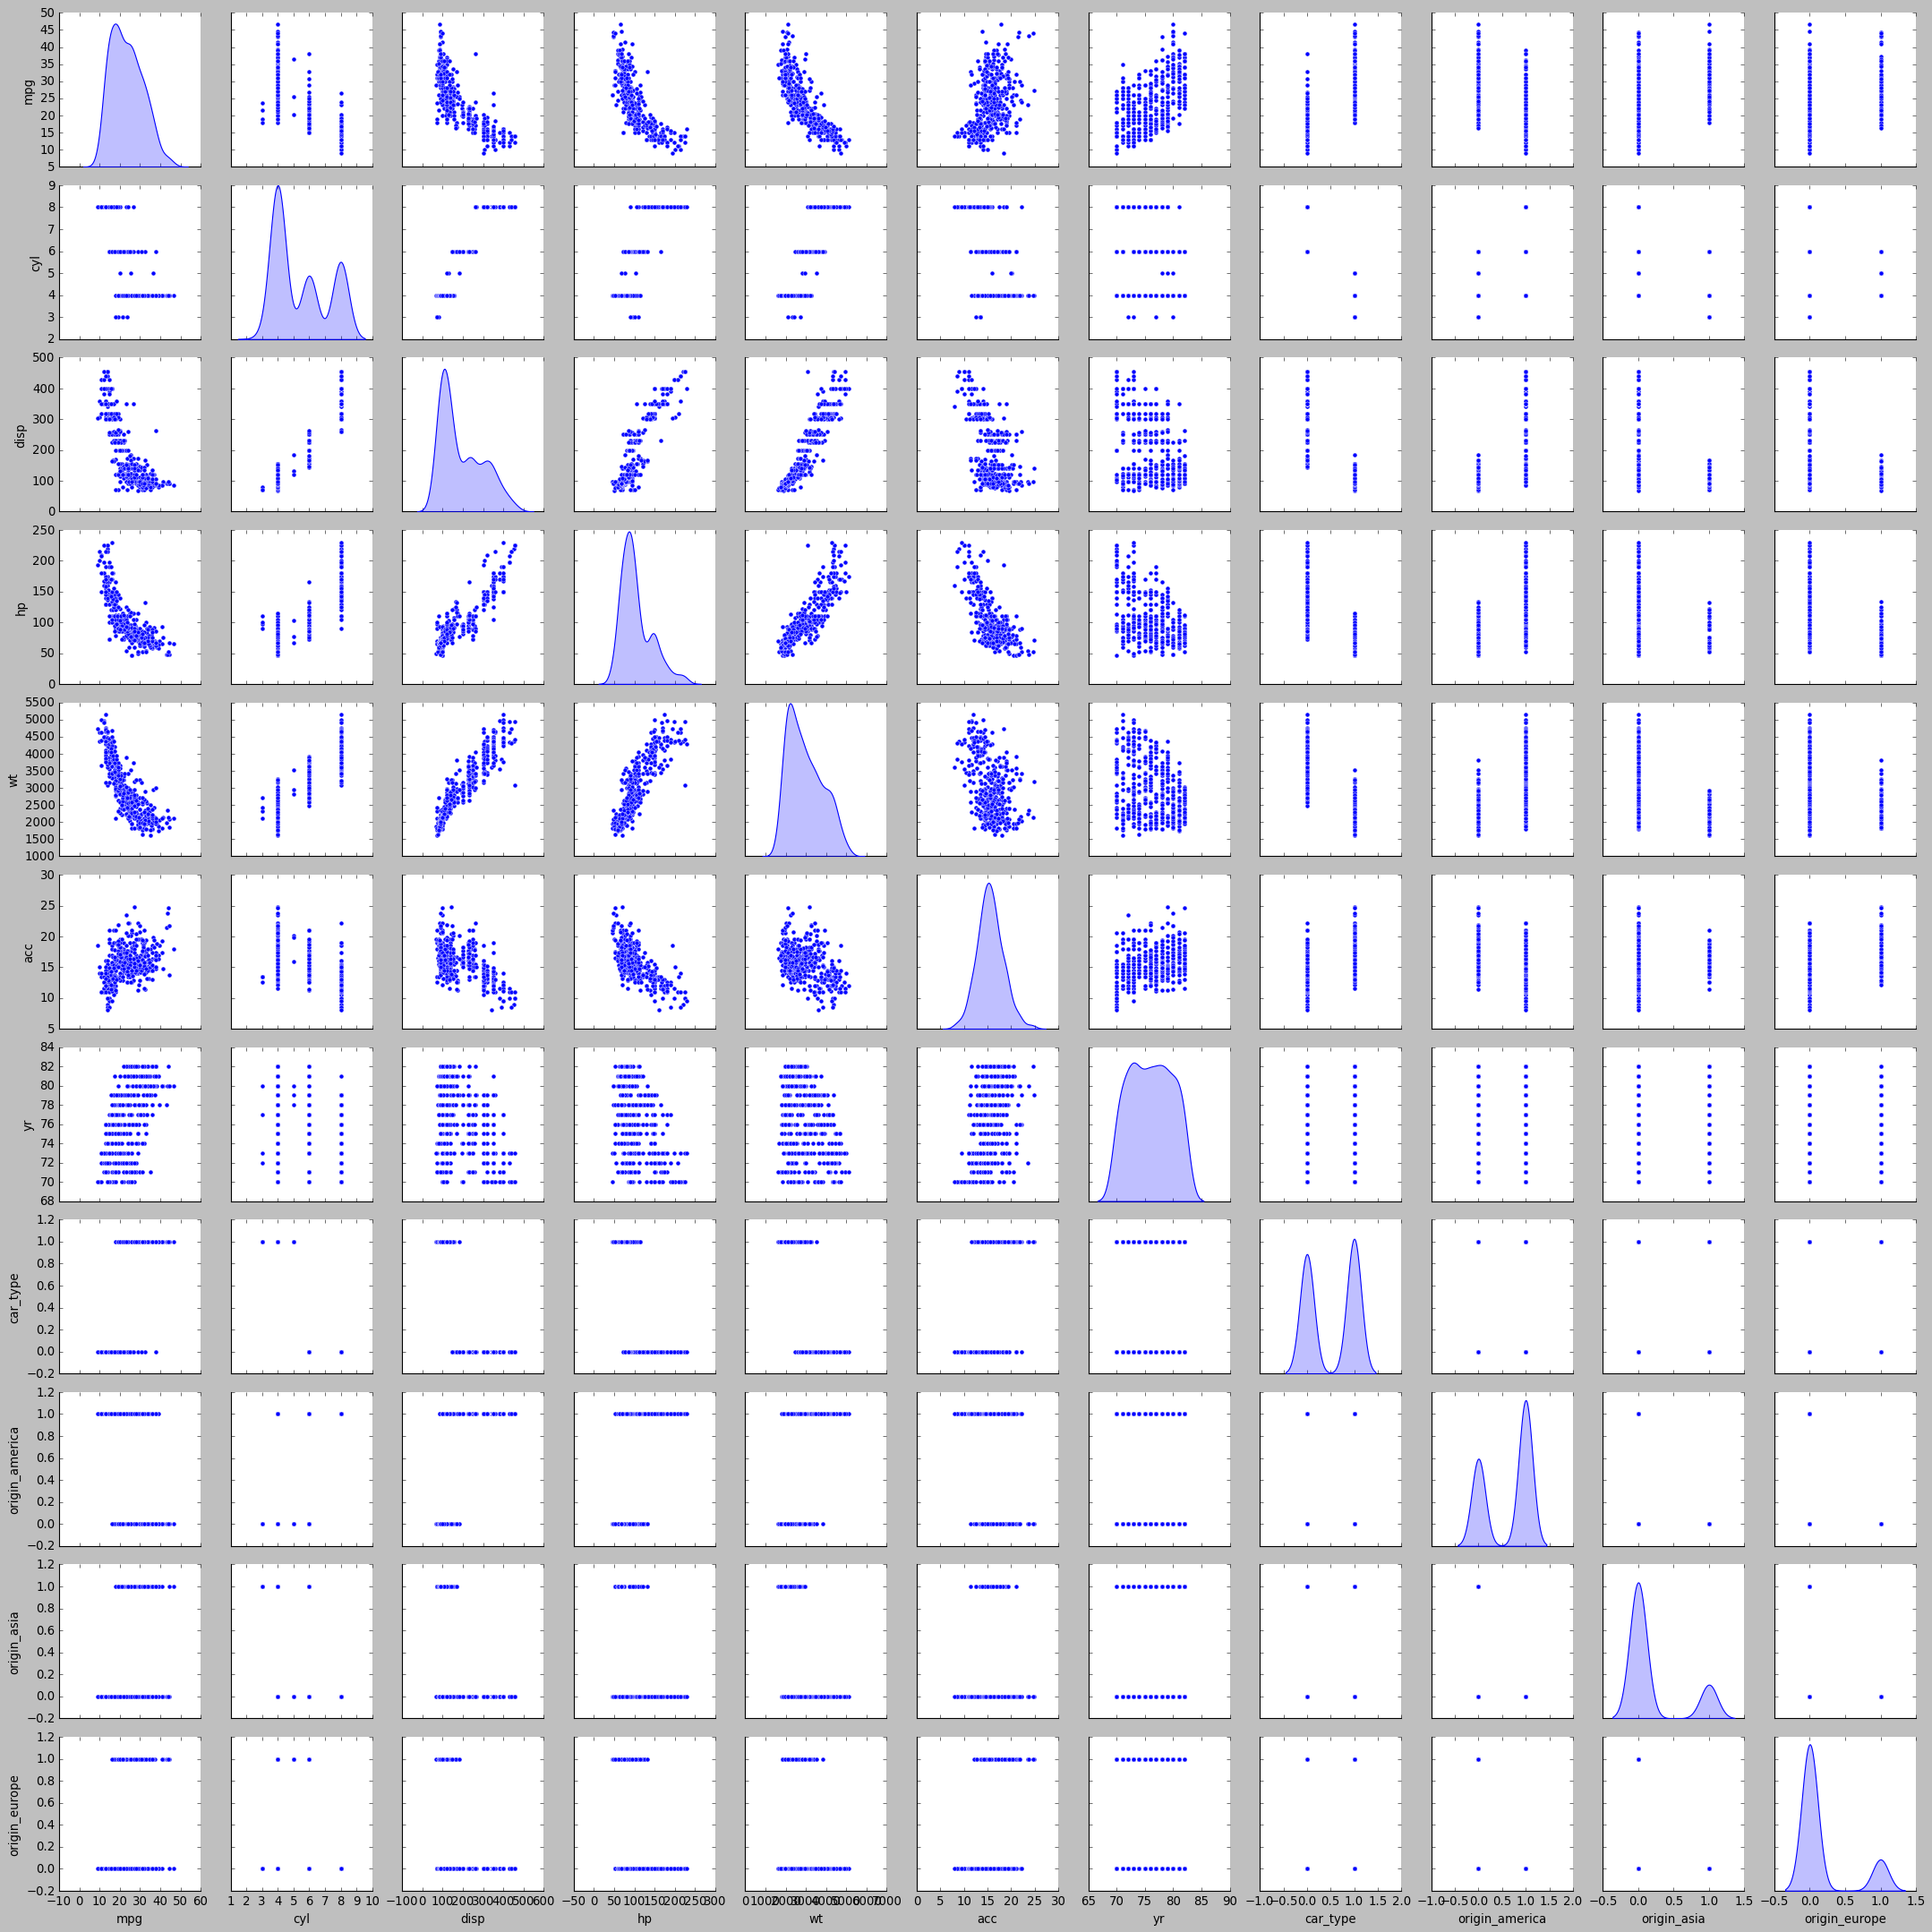

In [42]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()

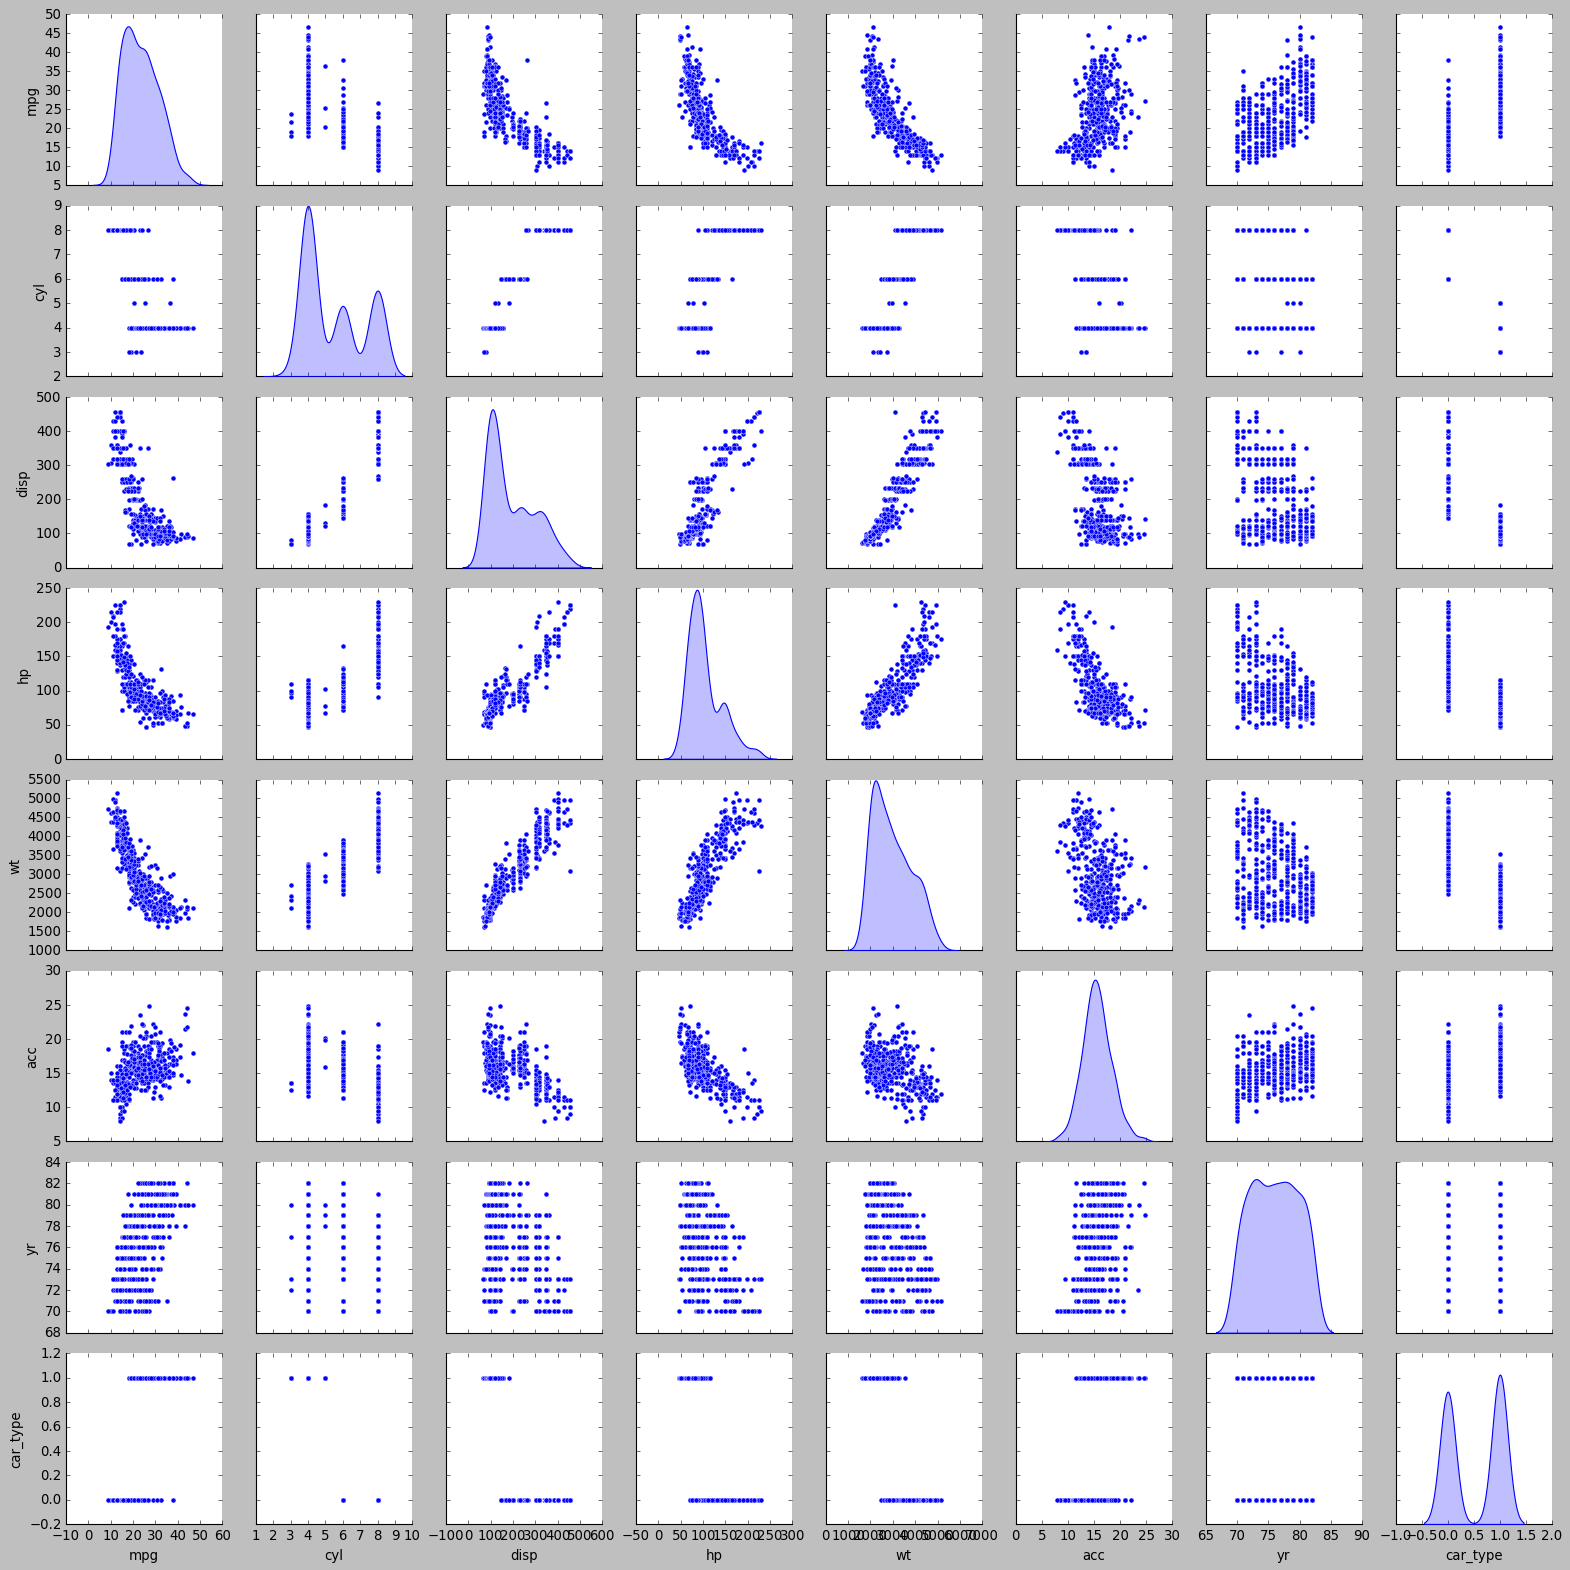

In [43]:
sns.pairplot(df_attr, diag_kind = 'kde')
plt.show()

<font color='blue'> ***Inference*** </font>
- The data distribution across various dimensions except 'Acc' does not look normal
- Close observation between 'mpg' and other attributes indicates the relationship is not really linear
- How about 'wt' vs 'disp' and 'wt' vs 'hp' surprising to see a positive relation

## <font color = 'green'> Train and Test Split

In [44]:
df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,1,0,0


In [45]:
X = df.drop('mpg', axis = 1)
y = df[['mpg']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)

In [47]:
X_train

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
176,6,232.0,90.0,3211,17.0,75,0,1,0,0
95,8,455.0,225.0,4951,11.0,73,0,1,0,0
29,4,97.0,88.0,2130,14.5,71,1,0,1,0
57,4,113.0,95.0,2278,15.5,72,1,0,1,0
143,4,97.0,78.0,2300,14.5,74,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
368,4,112.0,88.0,2640,18.6,82,1,1,0,0
48,6,250.0,88.0,3139,14.5,71,0,1,0,0
260,6,225.0,110.0,3620,18.7,78,0,1,0,0
312,4,86.0,65.0,2019,16.4,80,1,0,1,0


In [48]:
X_test

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
302,4,105.0,70.0,2150,14.9,79,1,1,0,0
9,8,390.0,190.0,3850,8.5,70,0,1,0,0
40,8,351.0,153.0,4154,13.5,71,0,1,0,0
52,4,88.0,76.0,2065,14.5,71,1,0,0,1
290,8,351.0,142.0,4054,14.3,79,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
331,4,97.0,67.0,2145,18.0,80,1,0,1,0
382,4,108.0,70.0,2245,16.9,82,1,0,1,0
178,4,120.0,88.0,2957,17.0,75,1,0,0,1
113,6,155.0,107.0,2472,14.0,73,0,1,0,0


## <font color = 'green'> Linear Regression - Gradient Method

In [49]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

#### Co-efficient

In [50]:
X_train.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type', 'origin_america',
       'origin_asia', 'origin_europe'],
      dtype='object')

In [51]:
regression_model.coef_[0]

array([ 1.280091  ,  0.02615696, -0.03359873, -0.00675901,  0.1420101 ,
        0.79411875,  5.58869153, -1.61063322,  0.63903497,  0.97159826])

In [52]:
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.2800910043842952
The coefficient for disp is 0.026156957181032114
The coefficient for hp is -0.033598732154873405
The coefficient for wt is -0.006759009555652468
The coefficient for acc is 0.14201010388312524
The coefficient for yr is 0.7941187506754511
The coefficient for car_type is 5.588691527009089
The coefficient for origin_america is -1.6106332236087142
The coefficient for origin_asia is 0.639034966976462
The coefficient for origin_europe is 0.9715982566322546


#### Intercept

In [53]:
intercept = regression_model.intercept_
print('The Intercept for the model is {}'.format(intercept))

The Intercept for the model is [-29.66037144]


####  Model Score (R-Square)

In [54]:
regression_model.score(X_train, y_train)

0.8358574100246182

In [55]:
regression_model.score(X_test, y_test)

0.8464199066257443

## <font color = 'green'> Linear Regression - Ordinary Least Square Method

In [56]:
data_train = pd.concat([X_train, y_train], axis = 1)

In [57]:
data_train

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
176,6,232.0,90.0,3211,17.0,75,0,1,0,0,19.0
95,8,455.0,225.0,4951,11.0,73,0,1,0,0,12.0
29,4,97.0,88.0,2130,14.5,71,1,0,1,0,27.0
57,4,113.0,95.0,2278,15.5,72,1,0,1,0,24.0
143,4,97.0,78.0,2300,14.5,74,1,0,0,1,26.0
...,...,...,...,...,...,...,...,...,...,...,...
368,4,112.0,88.0,2640,18.6,82,1,1,0,0,27.0
48,6,250.0,88.0,3139,14.5,71,0,1,0,0,18.0
260,6,225.0,110.0,3620,18.7,78,0,1,0,0,18.6
312,4,86.0,65.0,2019,16.4,80,1,0,1,0,37.2


<font color='blue'> ***Points*** 
- R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
  influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
- Scikit does not provide a facility for adjusted R^2... so we use statsmodel
- This library expects the X and Y to be given in one single dataframe

In [58]:
lm = smf.ols(formula= 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_asia+origin_europe', data = data_train).fit()
print(lm.params)

Intercept        -22.245279
cyl                1.280091
disp               0.026157
hp                -0.033599
wt                -0.006759
acc                0.142010
yr                 0.794119
car_type           5.588692
origin_america    -9.025726
origin_asia       -6.776058
origin_europe     -6.443495
dtype: float64


In [59]:
print(lm.summary())  # Inferential Statistics

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     151.6
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          9.42e-100
Time:                        11:32:10   Log-Likelihood:                -717.02
No. Observations:                 278   AIC:                             1454.
Df Residuals:                     268   BIC:                             1490.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -22.2453      4.220     -5.

In [60]:
X_test.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type', 'origin_america',
       'origin_asia', 'origin_europe'],
      dtype='object')

In [61]:
y_predict = pd.DataFrame(regression_model.predict(X_test), index = X_test.index)
pd.concat([y_predict, y_test], axis = 1)

,0,mpg
302,30.152081,34.5
9,13.560389,15.0
40,13.232851,14.0
52,26.252814,30.0
290,20.744896,15.5
...,...,...
331,33.561435,33.8
382,34.504491,34.0
178,24.189116,23.0
113,20.119344,21.0


In [62]:
mean_sq_error = np.mean((regression_model.predict(X_test)-y_test)**2)

C:\Users\SILAMBARASAN\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [63]:
mean_sq_error

mpg    8.839783
dtype: float64

<font color='blue'> ***Inference*** </font>
- Let's check the sum of squared errors by predicting value of y for test cases and 
subtracting from the actual y for the test cases

In [64]:
math.sqrt(mean_sq_error)

2.9731773215078086

<font color='blue'> ***inference***
- so there is avg of 3.0 (roundoff) mpg difference from real mpg on an avg

Note: underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

In [65]:
y_predict = regression_model.predict(X_test)

In [66]:
regression_model.score(X_test, y_test)

0.8464199066257443

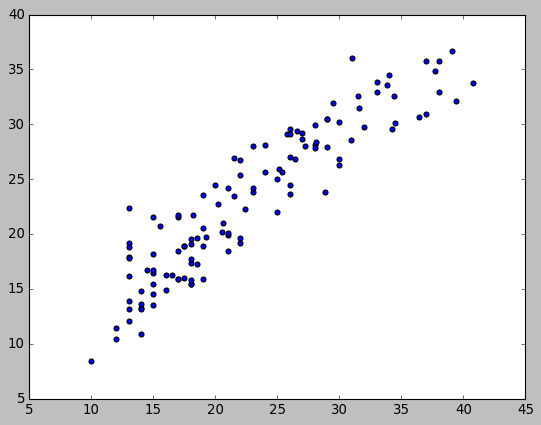

In [67]:
plt.scatter(y_test, y_predict)
plt.show()

<font color='blue'> ***Inference***
- Since this is regression, plot the predicted y value vs actual y values for the test data
- A good model's prediction will be close to actual leading to high R and R2 values

### <font color = 'green'> For Train set

In [68]:
X_train.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type', 'origin_america',
       'origin_asia', 'origin_europe'],
      dtype='object')

In [69]:
ytrain_predict = pd.DataFrame(regression_model.predict(X_train), index = X_train.index )
pd.concat([y_train, ytrain_predict], axis = 1)

,mpg,0
176,19.0,19.723968
95,12.0,9.380348
29,27.0,25.313143
57,24.0,25.432259
143,26.0,27.215018
...,...,...
368,27.0,29.326282
48,18.0,17.217139
260,18.6,18.728233
312,37.2,33.965325


In [70]:
mse_train = np.mean((regression_model.predict(X_train)-y_train)**2)
mse_train

C:\Users\SILAMBARASAN\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


mpg    10.181347
dtype: float64

In [71]:
math.sqrt(mse_train)

3.1908223447882076

In [72]:
ytrain_predict = regression_model.predict(X_train)

In [73]:
regression_model.score(X_train, y_train)

0.8358574100246182

In [74]:
regression_model.score(X_test, y_test)

0.8464199066257443

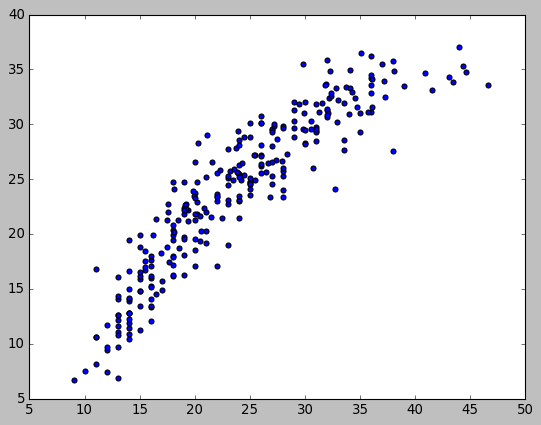

In [75]:
plt.scatter(y_train, ytrain_predict)
plt.show()

## <font color = 'green'> Further Analysis

- How do we improve the model? the R^2 is .846, how do we improve it
- The indpendent attributes have different units and scales of measurement 
- It is always a good practice to scale all the dimensions using z scores or someother method to address the problem of different scales 

In [76]:
# train, test scaled version
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [77]:
r_model = LinearRegression()
r_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [78]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, r_model.coef_[0][idx]))

The coefficient for cyl is 0.2774849018610502
The coefficient for disp is 0.35334890309451905
The coefficient for hp is -0.1681923916099515
The coefficient for wt is -0.7410663327928061
The coefficient for acc is 0.04909273949470757
The coefficient for yr is 0.37061291615267633
The coefficient for car_type is 0.3524453329844251
The coefficient for origin_america is -0.08414955546542115
The coefficient for origin_asia is 0.04703773649225085
The coefficient for origin_europe is 0.057681424973370796


In [79]:
intercept = r_model.intercept_[0]
print('The intercept for our model is {}'.format(intercept))

The intercept for our model is -3.0730167976091463e-16


In [80]:
r_model.score(X_train_scaled, y_train_scaled)

0.8358574100246182

In [81]:
r_model.score(X_test_scaled, y_test_scaled)

0.8522598423216179

In [82]:
mse = np.mean((r_model.predict(X_test_scaled)-y_test_scaled)**2)
mse

C:\Users\SILAMBARASAN\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


mpg    0.14774
dtype: float64

In [83]:
math.sqrt(mse)

0.3843698188963099

In [84]:
X_test_scaled.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type', 'origin_america',
       'origin_asia', 'origin_europe'],
      dtype='object')

In [85]:
y_scaled_predict = pd.DataFrame(r_model.predict(X_test_scaled), index = X_test_scaled.index)
pd.concat([y_test_scaled, y_scaled_predict], axis = 1)

,mpg,0
302,1.549530,0.935780
9,-1.020755,-1.241444
40,-1.152564,-1.300262
52,0.956388,0.445023
290,-0.954850,-0.346228
...,...,...
331,1.457264,1.391581
382,1.483626,1.503383
178,0.033721,0.114923
113,-0.229898,-0.346739


In [86]:
y_scaled_predict = r_model.predict(X_test_scaled)

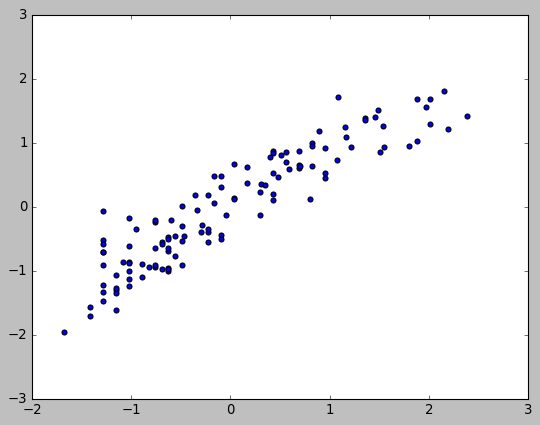

In [87]:
plt.scatter(y_test_scaled, y_scaled_predict)
plt.show()

In [88]:
# Finding Multi-Collinearity
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [89]:
vif

[17.89743609280417,
 23.07598647406674,
 9.980247199288577,
 10.98384868144468,
 2.5542513506599884,
 1.3023362570960026,
 7.087438904687801,
 523.1517829109134,
 167.43653106986787,
 145.3216623387118]

In [90]:
i=0
for column in X.columns:
    print (column ,"--->",  vif[i])
    i = i+1

cyl ---> 17.89743609280417
disp ---> 23.07598647406674
hp ---> 9.980247199288577
wt ---> 10.98384868144468
acc ---> 2.5542513506599884
yr ---> 1.3023362570960026
car_type ---> 7.087438904687801
origin_america ---> 523.1517829109134
origin_asia ---> 167.43653106986787
origin_europe ---> 145.3216623387118


####  <font color = 'blue'> Inference
- The attributes cyl, disp, hp and wt are highly correlated with each other
- So, cyl and disp have higher values in varience inflance factor due to both are correlated.
- Now we can drop these two variable and check how the model is look like and how it is impact other variables  

<Axes: >

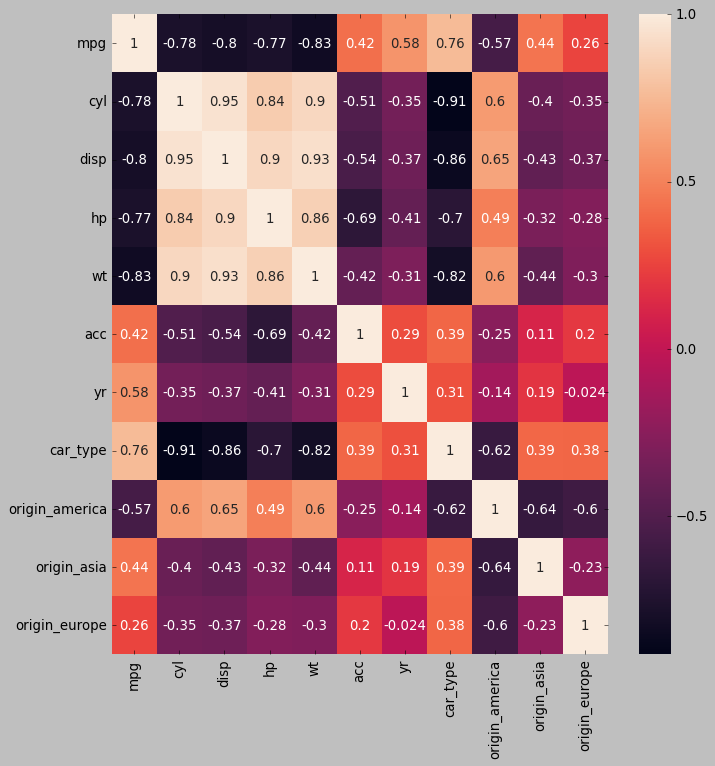

In [91]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)